In [8]:
# Create or activate the virtual environment and install dependencies
import os

# Suppress output using redirect
def silent_install(cmd):
    os.system(f"{cmd} > /dev/null 2>&1")

# Create the virtual environment if it doesn't exist
if not os.path.exists("env"):
    silent_install("python -m venv env")

# Activate the virtual environment and install requirements
# it does not work
silent_install("env/bin/python -m pip install --upgrade pip")
silent_install("env/bin/python -m pip install yfinance seaborn pandas_datareader")

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()  # Enable interactive mode

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
from tqdm import tqdm
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime, timedelta

In [50]:
# The tech stocks we'll use for this analysis
tech_list = ["WMT", "ADSK", "MA", "NOW"]

# Set up End and Start times for data grab
tech_list = ["WMT", "ADSK", "MA", "NOW"]

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [WMT, ADSK, MA, NOW]
company_name = ["WMT", "ADSK", "MA", "NOW"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High Low Open Volume company_name Adj Close Close  \
Ticker           WMT   WMT  WMT WMT  WMT    WMT                   ADSK  ADSK   
Date                                                                           
2024-12-02       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-03       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-04       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-05       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-06       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-09       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-10       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-11       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-12       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   
2024-12-13       NaN   NaN  NaN NaN  NaN    NaN          NOW       NaN   NaN   

Price      High  ...     Low Open Volume    Adj Close        Close  \
Ticker     ADSK  ...  MA  MA   MA     MA          NOW          NOW   
Date             ...                                                 
2024-12-02  NaN  ... NaN NaN  NaN    NaN  1048.430054  1048.430054   
2024-12-03  NaN  ... NaN NaN  NaN    NaN  1057.319946  1057.319946   
2024-12-04  NaN  ... NaN NaN  NaN    NaN  1123.130005  1123.130005   
2024-12-05  NaN  ... NaN NaN  NaN    NaN  1123.719971  1123.719971   
2024-12-06  NaN  ... NaN NaN  NaN    NaN  1124.339966  1124.339966   
2024-12-09  NaN  ... NaN NaN  NaN    NaN  1120.479980  1120.479980   
2024-12-10  NaN  ... NaN NaN  NaN    NaN  1127.839966  1127.839966   
2024-12-11  NaN  ... NaN NaN  NaN    NaN  1147.180054  1147.180054   
2024-12-12  NaN  ... NaN NaN  NaN    NaN  1148.420044  1148.420044   
2024-12-13  NaN  ... NaN NaN  NaN    NaN  1121.099976  1121.099976   

Price              High          Low         Open     Volume  
Ticker              NOW          NOW          NOW        NOW  
Date                                                          
2024-12-02  1055.319946  1045.489990  1048.400024  1056600.0  
2024-12-03  1057.650024  1036.910034  1040.089966  1284200.0  
2024-12-04  1126.630005  1080.000000  1083.670044  2063000.0  
2024-12-05  1130.599976  1113.109985  1115.099976  1075500.0  
2024-12-06  1137.000000  1120.000000  1135.619995   904400.0  
2024-12-09  1134.020020  1105.709961  1124.199951  1223400.0  
2024-12-10  1147.369995  1114.020020  1114.020020  1599200.0  
2024-12-11  1157.900024  1136.040039  1136.040039  1244800.0  
2024-12-12  1154.680054  1137.000000  1140.939941   687400.0  
2024-12-13  1141.760010  1114.599976  1130.000000  1347100.0  

[10 rows x 25 columns]

In [51]:
# Summary Stats
WMT.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,WMT,WMT,WMT,WMT,WMT,WMT
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,54.128438,55.139205,55.538318,54.697179,55.109488,2.009719e+07
std,12.452706,12.011270,12.043394,11.933511,11.993917,1.153109e+07
min,38.067692,39.430000,40.000000,39.090000,39.433334,6.287500e+06
25%,45.790920,47.324999,47.681665,46.866669,47.358334,1.409610e+07
50%,50.401119,51.496666,51.836666,51.193333,51.520000,1.734210e+07
75%,59.173986,59.680000,60.020000,59.220001,59.619999,2.204040e+07
max,95.488434,95.699997,96.180000,95.330002,95.680000,1.329402e+08


In [52]:
# General info
WMT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2021-12-14 to 2024-12-13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, WMT)  755 non-null    float64
 1   (Close, WMT)      755 non-null    float64
 2   (High, WMT)       755 non-null    float64
 3   (Low, WMT)        755 non-null    float64
 4   (Open, WMT)       755 non-null    float64
 5   (Volume, WMT)     755 non-null    int64  
 6   (company_name, )  755 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.2+ KB


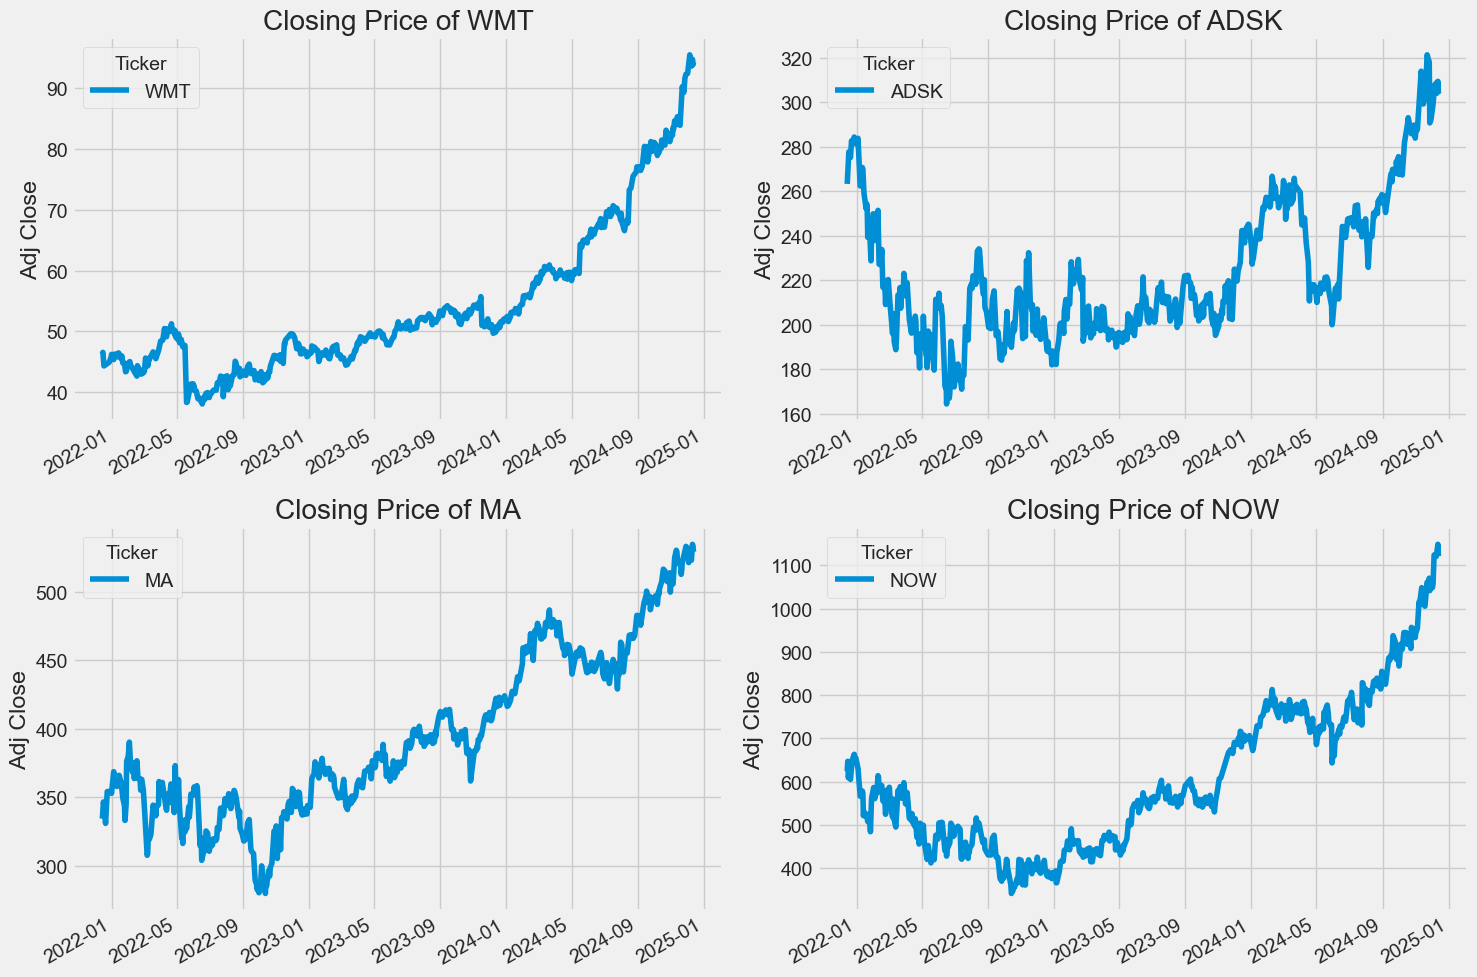

In [53]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_companies = len(company_list)
axes = []

# Plot only valid companies
for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Adj Close'].plot(ax=ax)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    axes.append(ax)

# Remove unused subplots
for j in range(len(company_list) + 1, 5):  # Subplots from num_companies+1 to 4
    plt.delaxes(plt.subplot(2, 2, j))

plt.tight_layout()
plt.show()

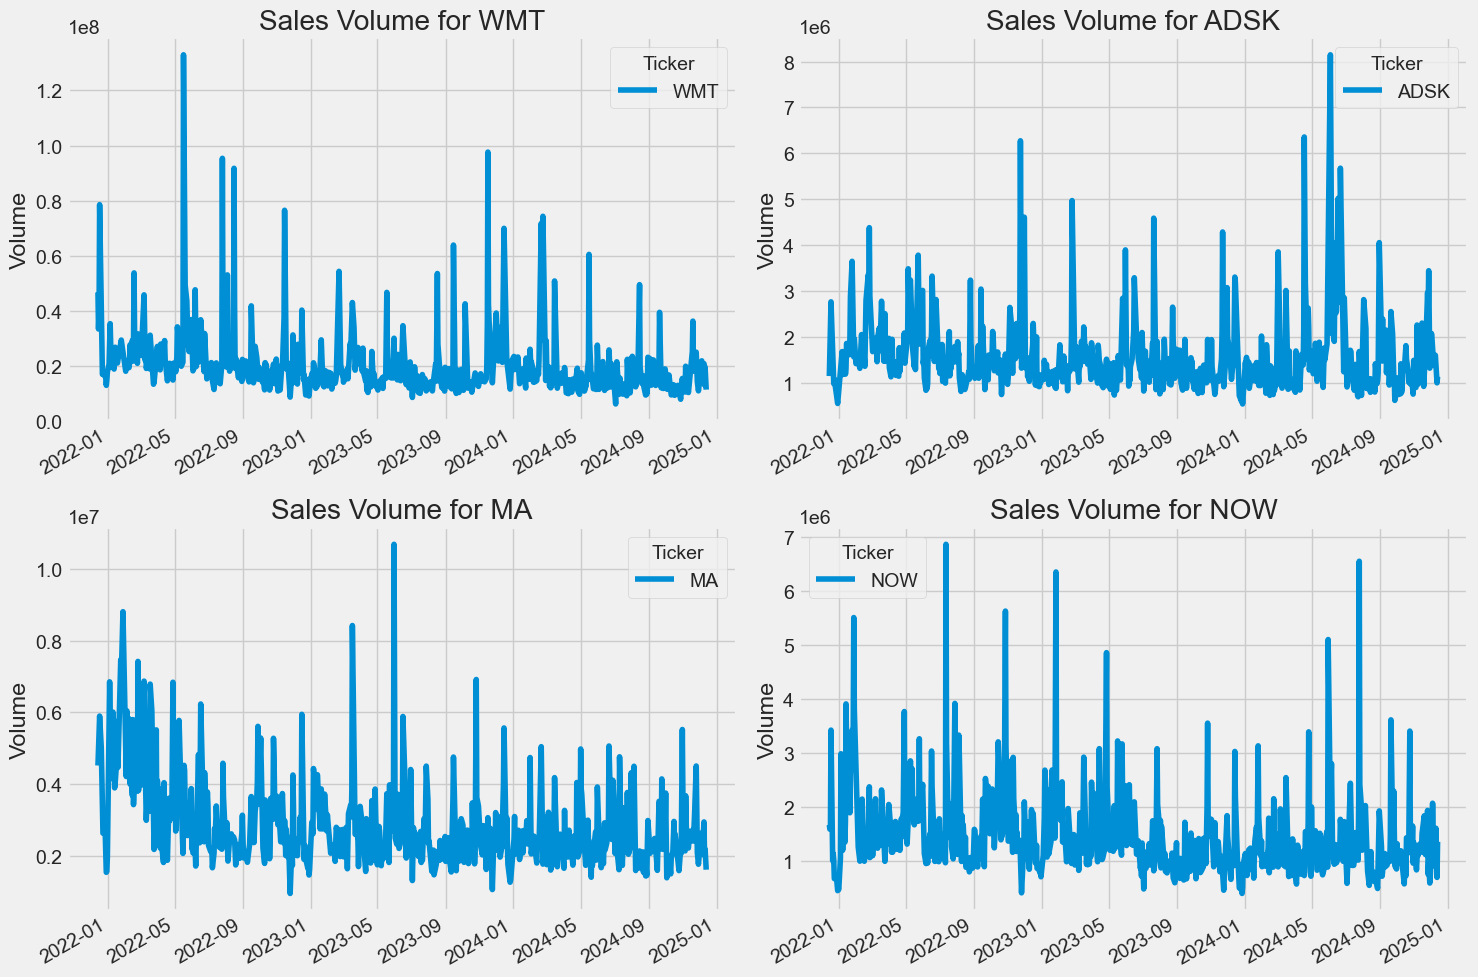

In [54]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_companies = len(company_list)
axes = []

# Plot only valid companies
for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Volume'].plot(ax=ax)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    axes.append(ax)

# Remove unused subplots
for j in range(len(company_list) + 1, 5):  # Subplots from num_companies+1 to 4
    plt.delaxes(plt.subplot(2, 2, j))

plt.tight_layout()
plt.show()

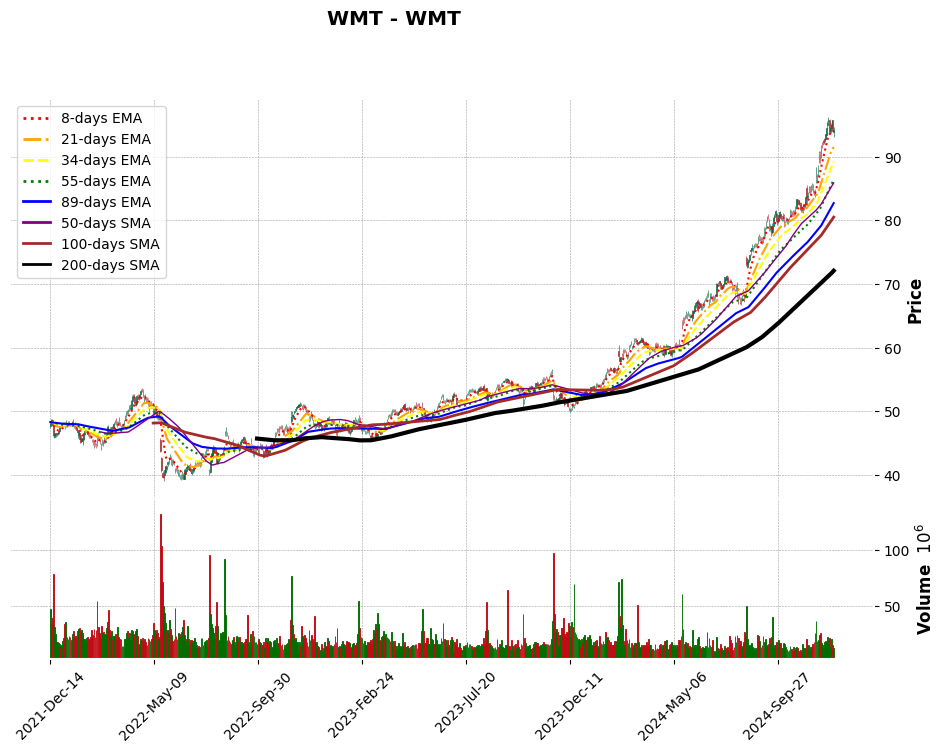

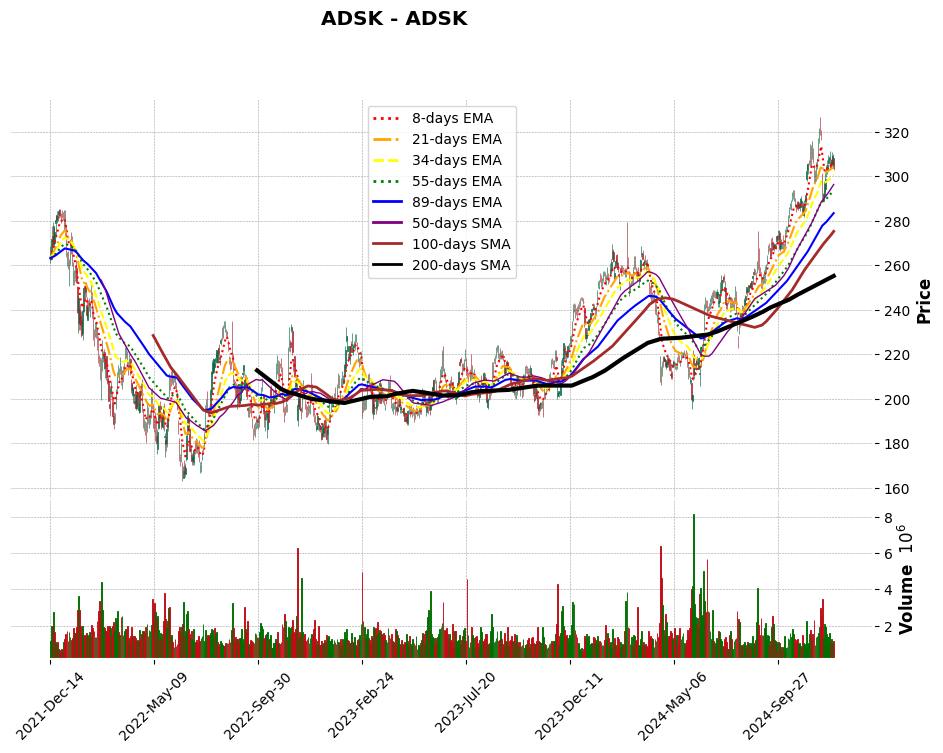

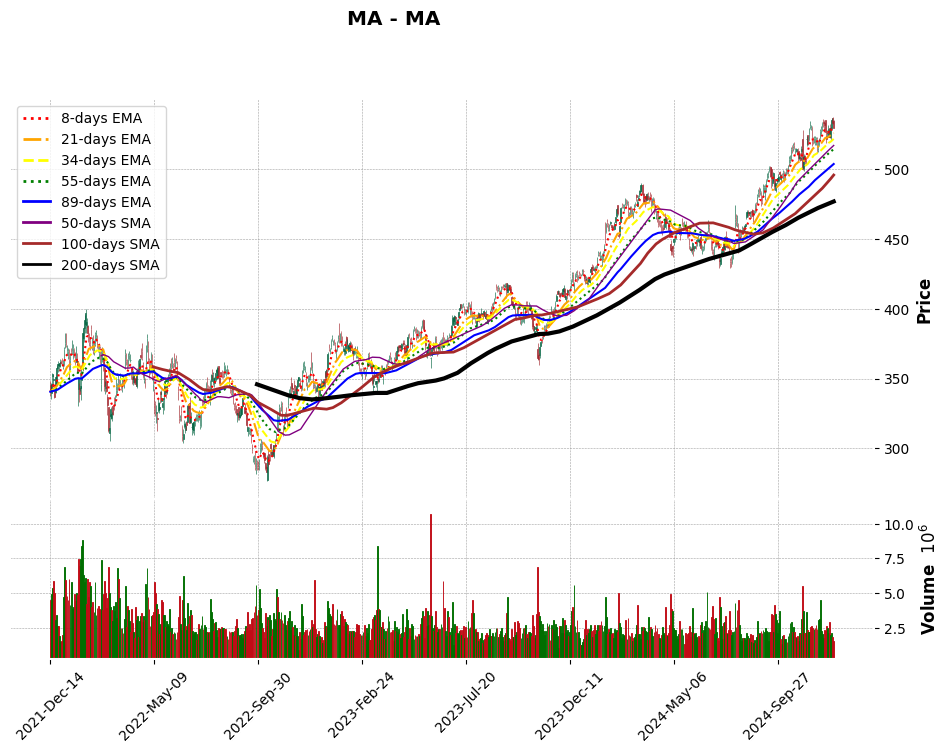

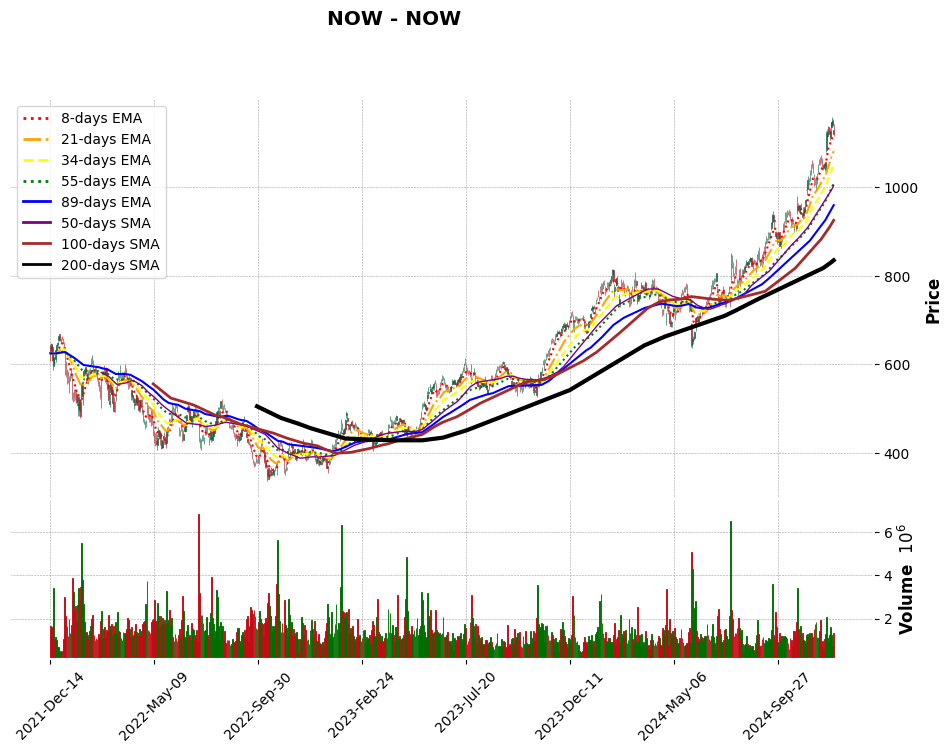

In [55]:
# List of EMA and SMA periods
ema_periods = [8, 21, 34, 55, 89]
sma_periods = [50, 100, 200]

# Titles for plot legend
ema_titles = [f"{period}-days EMA" for period in ema_periods]
sma_titles = [f"{period}-days SMA" for period in sma_periods]

# Define colors for each moving average
ema_colors = ['red', 'orange', 'yellow', 'green', 'blue']
sma_colors = ['purple', 'brown', 'black']

# Define valid line styles for EMAs
ema_styles = ['dotted', 'dashdot', 'dashed', 'dotted', 'solid']
sma_thickness = [1, 2, 3]  # Thickness levels for SMAs


# Function to clean and flatten the DataFrame
def clean_and_flatten_data(df, ticker):
    # Extract the data for the given ticker from the MultiIndex
    df = df.xs(ticker, level='Ticker', axis=1)
    
    # Ensure required columns are present
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns: {missing_columns}")
    
    # Drop rows with NaN in required columns
    df = df.dropna(subset=required_columns)
    
    # Ensure all numeric columns are of numeric type
    df[required_columns] = df[required_columns].apply(pd.to_numeric, errors='coerce')
    
    return df

# Plot function with candlestick chart and indicators
def plot_candlestick_with_indicators(df, chart_title, ticker):
    # Clean and flatten the data
    df = clean_and_flatten_data(df, ticker)
    
    # Add moving averages as additional columns to the DataFrame
    for period in ema_periods:
        df[f"{period}-days EMA"] = df['Close'].ewm(span=period, adjust=False).mean()
    for period in sma_periods:
        df[f"{period}-days SMA"] = df['Close'].rolling(window=period).mean()
    
    # Prepare the moving averages dictionary for mplfinance
    add_plots = []
    legends = []  # Collect legend labels

    # Add EMAs with specified line styles
    for ema_title, color, style in zip(ema_titles, ema_colors, ema_styles):
        if ema_title in df.columns:
            add_plots.append(mpf.make_addplot(df[ema_title], color=color, linestyle=style, width=1.5))
            legends.append((ema_title, color, style))  # Collect legend info
    
    # Add SMAs with varying thickness
    for sma_title, color, thickness in zip(sma_titles, sma_colors, sma_thickness):
        if sma_title in df.columns:
            add_plots.append(mpf.make_addplot(df[sma_title], color=color, linestyle='solid', width=thickness))
            legends.append((sma_title, color, 'solid'))  # Collect legend info
    
    # Create the plot
    fig, axlist = mpf.plot(
        df,
        type='candle',
        style='charles',
        title=chart_title,
        ylabel='Price',
        volume=True,
        addplot=add_plots,
        figsize=(12, 8),
        warn_too_much_data=len(df) + 1,
        returnfig=True  # Return the figure and axes for custom legend
    )
    
    # Add custom legend
    ax = axlist[0]  # Get the main plot axis
    handles = [
        plt.Line2D([0], [0], color=color, linestyle=style, label=label)
        for label, color, style in legends
    ]
    ax.legend(handles=handles, loc='best')  # Add legend to the plot
    plt.show()

# Replace the companies dictionary with actual DataFrame objects and correct tickers
companies = {
    "WMT": "WMT",
    "ADSK": "ADSK",
    "MA": "MA",
    "NOW": "NOW"
}

# Plot for each company
for company_name, ticker in companies.items():
    title = f"{company_name} - {ticker}"
    plot_candlestick_with_indicators(eval(ticker), title, ticker)

[*********************100%***********************]  1 of 1 completed
C:\Users\ellen\AppData\Local\Temp\ipykernel_12400\593936516.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to fit the rotated labels


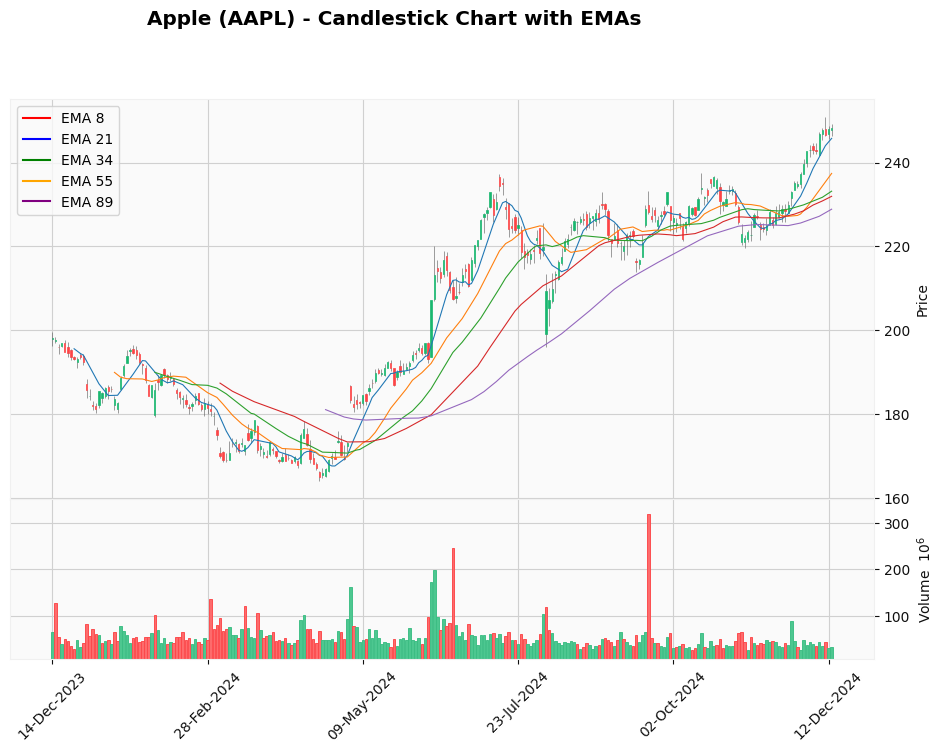

In [12]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt

# Define stock and time range
stock = "AAPL"
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data
AAPL = yf.download(stock, start, end)

# Flatten the column index if multi-level
AAPL.columns = [col[0] if isinstance(col, tuple) else col for col in AAPL.columns]

# Calculate Exponential Moving Averages (EMAs)
ema_days = [8, 21, 34, 55, 89]
for ema in ema_days:
    AAPL[f"EMA_{ema}"] = AAPL['Adj Close'].ewm(span=ema, adjust=False).mean()

# Select relevant columns for plotting
plot_data = AAPL[['Open', 'High', 'Low', 'Close', 'Volume'] + [f"EMA_{ema}" for ema in ema_days]].dropna()

# Convert columns to numeric (just in case)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plot_data[numeric_columns] = plot_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot the candlestick chart
fig, axlist = mpf.plot(
    plot_data,
    type='candle',  # Candlestick chart
    mav=ema_days,  # Add EMAs
    volume=True,  # Include volume bars
    title=f"Apple (AAPL) - Candlestick Chart with EMAs",
    style='yahoo',  # Predefined style
    figsize=(12, 8),
    returnfig=True  # Return figure for further customization
)

# Customize the x-axis to show only 6 evenly spaced dates
ax = axlist[0]  # Main chart axis
xticks_positions = list(range(0, len(plot_data.index), len(plot_data.index) // 5))  # 5 intervals = 6 labels
xticks_labels = [plot_data.index[i].strftime("%d-%b-%Y") for i in xticks_positions]

ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

# Add the legend manually using matplotlib
legend_handles = [
    plt.Line2D([], [], color=color, label=f"EMA {ema}")
    for color, ema in zip(['red', 'blue', 'green', 'orange', 'purple'], ema_days)
]
ax.legend(handles=legend_handles, loc="best")

plt.tight_layout()  # Adjust layout to fit the rotated labels
plt.show()

In my trading strategy it is very important: 
<ol>
<li>recognize the trend;</li>
<li>use the 21-EMA (Exponential Moving Average) to assess the mid-point;</li>
<li>enter the trade when price is close to the average or +-1 ATR;</li>
<li>exit the trade when the price is between 2/3 ATR in bullish or -2/-3 in bearish mode.</li>
</ol>

<br/>
This stragegy takes into account the Kelleher curves and the ATR (Average True Rate) from the mean. The mean being the 21-EMA (this represent the average price in 1 month, and we use exponential moving average to make sure that the KPI adjusts quickly as the price fluctuates).<br/>
The first part of the program will take data from the S&P 500 stocks and will build the information to draw a candle plot, then we will add the 21-EMA of the closing price, and the Kelleher curves above and below the close price. <br/>
Then we will rank the stocks into <b>bullish</b> (uptrand) or <b>bearish</b> (downtrend) and we will execute the trades with a starting capital of 1,000. We will record each trade, entering point, exit point and the gain/loss to check what will be the overall quantity of money that the strategy will produce.

In [11]:
# 1. Fetch S&P 500 tickers from Wikipedia
def get_sp500_tickers():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    sp500_table = pd.read_html(url)[0]
    tickers = sp500_table['Symbol'].tolist()
    # Adjust tickers for Yahoo Finance (e.g., BRK.B -> BRK-B)
    tickers = [ticker.replace(".", "-") for ticker in tickers]
    return tickers

# 2. Download data for all tickers and combine them into one

def download_sp500_data(tickers, start_date=None, end_date=None):
    """
    Download daily data for multiple S&P 500 tickers from Yahoo Finance.

    Parameters:
        tickers (list): List of S&P 500 tickers.
        start_date (str, optional): Start date in 'YYYY-MM-DD' format. Defaults to 1 year ago.
        end_date (str, optional): End date in 'YYYY-MM-DD' format. Defaults to today.

    Returns:
        pd.DataFrame: Combined DataFrame with all tickers' data.
    """

    # Set default dates if not provided
    if end_date is None:
        end_date = datetime.now().strftime('%Y-%m-%d')  # Today's date
    if start_date is None:
        start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')  # 1 year ago


    all_data = []  # List to store data for each ticker

    for ticker in tqdm(tickers, desc="Downloading data"):
        try:
            # Download data for the specified ticker
            df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)

            if not df.empty:
                # Flatten the MultiIndex to get raw column names
                df.columns = df.columns.get_level_values(0)

                # Create a new DataFrame with the required structure
                new_df = pd.DataFrame()

                # Reset the index to make Date a column
                new_df['Date'] = df.index

                # Add the Ticker column explicitly for every row
                new_df['Ticker'] = ticker

                # Add the other columns
                new_df['Open'] = df['Open'].values
                new_df['High'] = df['High'].values
                new_df['Low'] = df['Low'].values
                new_df['Close'] = df['Close'].values
                new_df['Adj_Close'] = df['Adj Close'].values
                new_df['Volume'] = df['Volume'].values

                # Append the cleaned DataFrame to the list
                all_data.append(new_df)

        except Exception as e:
            print(f"Failed to download data for {ticker}: {e}")

    # Combine all data into a single DataFrame
    if all_data:
        combined_df = pd.concat(all_data, axis=0, ignore_index=True)
        return combined_df
    else:
        # Return an empty DataFrame if no data was downloaded
        return pd.DataFrame(columns=['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'])

# 4. Compute indicators for each stock
def compute_indicators(df):
    # Ensure 'Close' column exists
    if 'Close' not in df.columns:
        return df

    # Calculate EMAs and SMA
    df['8-EMA'] = df['Close'].ewm(span=8, adjust=False).mean()
    df['21-EMA'] = df['Close'].ewm(span=21, adjust=False).mean()
    df['50-SMA'] = df['Close'].rolling(window=50).mean()
    # Add higher highs and higher lows
    df['Higher High'] = df['High'].gt(df['High'].shift(1))
    df['Higher Low'] = df['Low'].gt(df['Low'].shift(1))
    return df

# 5. Flatten MultiIndex columns
def flatten_columns(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [col[0] for col in df.columns]  # Flatten MultiIndex
    return df

# 6. Analyze last 4 months for each stock
def analyze_stock(df):
    if df.empty or 'Close' not in df.columns:
        return 0

    # Filter last 4 months of data
    df = df.tail(4 * 21)  # Assuming 21 trading days per month

    # Criteria scores
    score = 0

    # Criterion 1: Higher highs and higher lows
    hh_score = df['Higher High'].sum() + df['Higher Low'].sum()
    score += hh_score / len(df)  # Normalize to [0, 1]

    # Criterion 2: Smooth retracements (low volatility)
    if not df['Close'].isnull().all():
        volatility = df['Close'].pct_change().std()
        retracement_score = 1 if not np.isnan(volatility) and volatility < 0.02 else 0
        score += retracement_score

    # Criterion 3: EMAs stacked (8 EMA > 21 EMA > 50 SMA)
    ema_condition = (df['8-EMA'] > df['21-EMA']) & (df['21-EMA'] > df['50-SMA'])
    ema_score = ema_condition.sum() / len(df)
    score += ema_score

    # Criterion 4: Price above 50 SMA
    price_above_sma = (df['Close'] > df['50-SMA']).sum() / len(df)
    score += price_above_sma

    # Criterion 5: Trend duration at least 4 months
    if ema_condition.sum() == len(df):
        score += 1  # Full score if trend is intact for the entire period

    return score

In [12]:
# Step 1: Get tickers
sp500_tickers = get_sp500_tickers()
print(f"Number of tickers: {len(sp500_tickers)}")

Number of tickers: 503


In [13]:
# Step 2: Download data
data = download_sp500_data(sp500_tickers,start_date="2023-08-15", end_date="2024-12-13")
data.shape

(168156, 8)

In [14]:
data.head()

,Date,Ticker,Open,High,Low,Close,Adj_Close,Volume
0,2023-08-15,MMM,85.744148,86.020065,84.381271,84.565216,79.280289,4000859
1,2023-08-16,MMM,84.255852,85.058525,83.996658,84.272575,79.005943,3412666
2,2023-08-17,MMM,84.640465,85.886292,84.531776,85.117058,79.797646,4071304
3,2023-08-18,MMM,83.595322,84.021736,83.260872,83.620399,79.566925,3150742
4,2023-08-21,MMM,83.612038,83.695648,82.382942,82.934784,78.914543,2754029


In [59]:
data.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj_Close',
       'Volume'],
      dtype='object')

In [27]:
df['Adj Close'].head()

Ticker,MMM
Date,
2024-01-02,88.892036
2024-01-03,87.106125
2024-01-04,87.413200
2024-01-05,87.752609
2024-01-08,87.970802


In [19]:
data.shape

(120790, 3020)

In [1]:
data.head()

NameError: name 'data' is not defined

In [1]:
# Step 3: Combine data
df_combined = combine_data(data)

NameError: name 'combine_data' is not defined

In [46]:
df_combined.columns

MultiIndex([(     'Date',    ''),
            ('Adj Close', 'MMM'),
            (    'Close', 'MMM'),
            (     'High', 'MMM'),
            (      'Low', 'MMM'),
            (     'Open', 'MMM'),
            (   'Volume', 'MMM'),
            (   'Ticker',    ''),
            ('Adj Close', 'AOS'),
            (    'Close', 'AOS'),
            ...
            (     'High', 'ZBH'),
            (      'Low', 'ZBH'),
            (     'Open', 'ZBH'),
            (   'Volume', 'ZBH'),
            ('Adj Close', 'ZTS'),
            (    'Close', 'ZTS'),
            (     'High', 'ZTS'),
            (      'Low', 'ZTS'),
            (     'Open', 'ZTS'),
            (   'Volume', 'ZTS')],
           names=['Price', 'Ticker'], length=3008)

In [ ]:
# Step 4: Flatten columns and simplify
df_combined = flatten_columns(df_combined)

In [44]:
# Step 5: Process each stock
grouped = data.groupby('Ticker')
results = []
for ticker, group in tqdm(grouped, desc="Analyzing stocks"):
        group = compute_indicators(group)
        score = analyze_stock(group)
        results.append((ticker, score))

Analyzing stocks: 100%|██████████| 503/503 [00:04<00:00, 112.59it/s]


In [48]:
 # Step 6: Create rankings
rankings = pd.DataFrame(results, columns=["Ticker", "Score"])
rankings = rankings.sort_values(by="Score", ascending=False)

In [49]:
rankings

,Ticker,Score
490,WMT,5.273810
11,ADSK,5.261905
295,MA,5.226190
339,NOW,5.202381
64,BLK,5.202381
...,...,...
300,MCHP,0.964286
427,SWKS,0.952381
31,AMTM,0.913793
391,QRVO,0.904762


The strategy that I am validating selects stocks with a strong trend and it wants to just follow the trend and make money out of it.<br/>
The software uses a moving windows of 4 months as analysis, and identify stocks with high trend (bullish or bearish, meaning that are going up or down) and the strategy is the following:<br/>
For bullish stocks (stocks going up):<br/>
You buy when the price is near to the average (it uses the 21-EMA exponential moving average), and it sells when the stock goes up in a belt between +2 / +3 ATR (Average True Rate). If this does not happen the trade is closed as soon as the price starts going down a little bit. The concept used is the average return, meaning that the price of the stock tends to get back to its mean, and the fact is that the stock breaths, meaning it goes up and down it does not stay close to the mean. <br/>
For bearish stocks (when the trend is negative), the procedures buys close to the -2/-3 ATR and sells the stock and closes the trade when the price returns back to the mean making a profit. If this does not happen as soon as the price starts to decrease a little bit it sells. <br/>
In order to validate the strategy, the software does not use the data of the current month, but uses historical data to take the decisions and select the stocks, once selected tries to make the trade, considering the budget that the user wants to allocate on each trade.

In [36]:
def validate_trading_strategy(data, trades_per_month=5, first_month="2024-01-01", last_month="2024-12-31",
                              trade_amount=300, initial_capital=10000, stop_loss_threshold=0.7, window_months=4):
    """
    Validate trading strategy for bullish and bearish markets.
    """
    # Prepare data
    data = data.copy()
    data['Date'] = pd.to_datetime(data['Date'])
    data['Month'] = data['Date'].dt.to_period('M')

    # Add indicators: EMAs and ATR
    for ema_period in [8, 21, 34, 55, 89]:
        data[f'{ema_period}-EMA'] = data.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span=ema_period).mean())

    data['ATR'] = data.groupby('Ticker', group_keys=False).apply(
        lambda g: (g['High'] - g['Low']).rolling(14).mean()
    )

    # Set parameters
    capital = initial_capital
    capital_evolution = [(None, capital)]
    trade_records = []

    # Convert first_month and last_month to Timestamps
    current_date = pd.Timestamp(first_month)
    end_date = pd.Timestamp(last_month)

    while current_date <= end_date:
        print(f"\n--- Trading for {current_date.strftime('%Y-%m')} ---")
        print(f"Starting Capital: {capital:.2f}")

        # Check stop loss condition
        if capital < initial_capital * stop_loss_threshold:
            print(f"STOPPING: Capital fell below 70% of the initial capital ({capital:.2f})")
            break

        # Reset exclusion list for the new month
        exclusion_list = set()

        # Lookback period for trend analysis
        lookback_start = (current_date - pd.DateOffset(months=window_months)).strftime('%Y-%m-%d')
        lookback_end = (current_date - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        historical_data = data[(data['Date'] >= lookback_start) & (data['Date'] <= lookback_end)]

        if historical_data.empty:
            print("No historical data available to analyze trends.")
            current_date += pd.DateOffset(months=1)
            continue

        trades_executed = 0

        while trades_executed < trades_per_month:
            # Get top N*6 tickers excluding those already tested
            top_tickers = analyze_trend(historical_data, 6 * trades_per_month, exclusion_list)
            if not top_tickers:
                print("No stocks left to analyze.")
                break

            for ticker in top_tickers:
                if trades_executed >= trades_per_month:
                    break

                # Filter stock data for the current month
                stock_data = data[(data['Ticker'] == ticker) & (data['Month'] == current_date.to_period('M'))].dropna(
                    subset=['ATR', '21-EMA']
                )
                if stock_data.empty:
                    exclusion_list.add(ticker)
                    continue

                for _, row in stock_data.iterrows():
                    price, atr, ema21, date = row['Close'], row['ATR'], row['21-EMA'], row['Date']

                    # Bullish condition
                    if validate_ema_stack(row, bullish=True) and (ema21 - atr <= price <= ema21 + atr):
                        quantity = trade_amount // price
                        if quantity == 0:
                            exclusion_list.add(ticker)
                            continue

                        buy_price = price
                        sell_price, sell_date = None, None

                        # Look for selling opportunities
                        for future_row in stock_data.iloc[stock_data.index.get_loc(row.name) + 1:].itertuples():
                            if future_row.Close >= ema21 + 2 * atr:
                                sell_price, sell_date = future_row.Close, future_row.Date
                                break

                        if sell_price:
                            profit = quantity * (sell_price - buy_price)
                            capital += profit
                            trades_executed += 1
                            trade_records.append({
                                'Ticker': ticker,
                                'Buy Date': date,
                                'Buy Price': buy_price,
                                'Sell Date': sell_date,
                                'Sell Price': sell_price,
                                'Profit/Loss': profit
                            })
                            print(f"Trade: {ticker}, Buy: {buy_price:.2f} on {date}, Sell: {sell_price:.2f} on {sell_date}, Profit: {profit:.2f}")
                            break

                exclusion_list.add(ticker)

            if trades_executed == 0:
                print("No trades executed. Re-analyzing with updated exclusion list...")

        print(f"Final Capital for {current_date.strftime('%Y-%m')}: {capital:.2f}")
        capital_evolution.append((current_date, capital))

        # Move to next month
        current_date += pd.DateOffset(months=1)

    return {
        'Trade Records': trade_records,
        'Capital Evolution': pd.DataFrame(capital_evolution, columns=['Date', 'Capital']),
        'Total Profit/Loss': capital - initial_capital
    }


def analyze_trend(historical_data, n_stocks=30, exclusion_list=None):
    """
    Analyze the strongest trends based on slope.
    """
    if exclusion_list is None:
        exclusion_list = set()

    trend_scores = {}
    for ticker, group in historical_data.groupby('Ticker'):
        if ticker in exclusion_list or group.empty:
            continue
        slope = np.polyfit(range(len(group)), group['Close'], 1)[0]
        trend_scores[ticker] = abs(slope)

    return sorted(trend_scores, key=trend_scores.get, reverse=True)[:n_stocks]


def validate_ema_stack(row, bullish=True):
    """
    Validate EMA stacking for bullish or bearish.
    """
    if bullish:
        return row['8-EMA'] < row['21-EMA'] < row['34-EMA'] < row['55-EMA'] < row['89-EMA']
    else:
        return row['8-EMA'] > row['21-EMA'] > row['34-EMA'] > row['55-EMA'] > row['89-EMA']

In [37]:
# Validate the strategy
results = validate_trading_strategy(data, 
                                    trades_per_month=10, 
                                    first_month="2024-01-01", 
                                    last_month="2024-12-16", 
                                    trade_amount=5000)

C:\Users\ellen\AppData\Local\Temp\ipykernel_12400\3656340457.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['ATR'] = data.groupby('Ticker', group_keys=False).apply(



--- Trading for 2024-01 ---
Starting Capital: 10000.00
Trade: WST, Buy: 351.85 on 2024-01-08 00:00:00, Sell: 370.50 on 2024-01-29 00:00:00, Profit: 261.10
Trade: AON, Buy: 299.30 on 2024-01-10 00:00:00, Sell: 311.58 on 2024-01-19 00:00:00, Profit: 196.48
Trade: HAS, Buy: 48.31 on 2024-01-23 00:00:00, Sell: 51.41 on 2024-01-29 00:00:00, Profit: 319.30
Trade: APTV, Buy: 83.08 on 2024-01-24 00:00:00, Sell: 87.44 on 2024-01-29 00:00:00, Profit: 261.60
Trade: XOM, Buy: 102.36 on 2024-01-02 00:00:00, Sell: 104.85 on 2024-01-30 00:00:00, Profit: 119.52
Trade: MKC, Buy: 66.80 on 2024-01-23 00:00:00, Sell: 69.08 on 2024-01-26 00:00:00, Profit: 168.72
Trade: SLB, Buy: 49.64 on 2024-01-19 00:00:00, Sell: 52.92 on 2024-01-26 00:00:00, Profit: 328.00
Trade: AJG, Buy: 225.90 on 2024-01-04 00:00:00, Sell: 238.79 on 2024-01-19 00:00:00, Profit: 283.58
Trade: VRSK, Buy: 234.72 on 2024-01-09 00:00:00, Sell: 243.46 on 2024-01-22 00:00:00, Profit: 183.54
Trade: HAL, Buy: 34.43 on 2024-01-22 00:00:00, Sel

In [38]:
# Display trade records
trade_records = pd.DataFrame(results['Trade Records'])
print(trade_records)

    Ticker   Buy Date   Buy Price  Sell Date  Sell Price  Profit/Loss
0      WST 2024-01-08  351.850006 2024-01-29  370.500000   261.099915
1      AON 2024-01-10  299.299988 2024-01-19  311.579987   196.479980
2      HAS 2024-01-23   48.310001 2024-01-29   51.410000   319.299843
3     APTV 2024-01-24   83.080002 2024-01-29   87.440002   261.600037
4      XOM 2024-01-02  102.360001 2024-01-30  104.849998   119.519897
..     ...        ...         ...        ...         ...          ...
110   IDXX 2024-12-02  430.769989 2024-12-09  450.679993   219.010040
111     DG 2024-12-02   77.790001 2024-12-06   81.589996   243.199707
112    HSY 2024-12-02  177.820007 2024-12-09  193.649994   443.239624
113   BF-B 2024-12-02   42.180000 2024-12-05   45.380001   377.600090
114    WBA 2024-12-02    8.980000 2024-12-10   10.420000   800.640297

[115 rows x 6 columns]


In [39]:
# Total profit/loss
print(f"Total Profit/Loss: {results['Total Profit/Loss']:.2f}")

Total Profit/Loss: 39585.48
